In [ ]:
!pip install git+https://github.com/data-8/datascience.git

  Cloning https://github.com/data-8/datascience.git to /tmp/pip-req-build-2vxpj95i
  Running command git clone --filter=blob:none --quiet https://github.com/data-8/datascience.git /tmp/pip-req-build-2vxpj95i
  Resolved https://github.com/data-8/datascience.git to commit ec3ebcd275dbfc370233781a8055da7b60b3be39
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.8 MB/s eta 0:00:00


In [ ]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plots
#plots.style.use('fivethirtyeight')
#plots.rcParams["patch.force_edgecolor"] = True

In [ ]:
politics_csv = "https://raw.githubusercontent.com/mallikareddy22/CSK_DataScience/main/CSK%202022%20DS%20Materials/politics_apr2020.csv"
politics = Table().read_table(politics_csv)
politics

ccode,country,leader,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,prev_conflict
2,USA,Trump,1,74,1,0,40,Presidential Democracy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
20,Canada,Trudeau,1,49,1,0,54,Parliamentary Democracy,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0
31,Bahamas,Hubert Minnis,1,66,1,0,36,Parliamentary Democracy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,Cuba,Raul Castro,1,89,1,1,147,Party-Personal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41,Haiti,Jovenel Moise,1,52,1,0,39,Presidential Democracy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42,Dominican Rep,Danilo Medina,1,69,1,0,93,Presidential Democracy,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51,Jamaica,Holness,1,48,1,0,50,Parliamentary Democracy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52,Trinidad and Tobago,Rowley,1,71,1,0,56,Parliamentary Democracy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53,Barbados,Mia Mottley,1,55,0,0,24,Parliamentary Democracy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54,Dominica,Roosevelt Skerrit,1,48,1,0,196,Parliamentary Democracy,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0


In [ ]:
politics_women = politics.where("male", are.equal_to(0))
politics_men = politics.where("male", are.equal_to(1))
num_politics_women = politics_women.num_rows
num_politics = politics.num_rows
percentage_women = num_politics_women/num_politics * 100
percentage_women

7.216494845360824

In [ ]:
politics_mw = politics.group("male")
politics_mw

male,count
0,14
1,180


In [ ]:
politics_women_type = politics_women.group("government")
politics_women_type

government,count
Parliamentary Democracy,12
Party-Military,1
Party-Personal,1


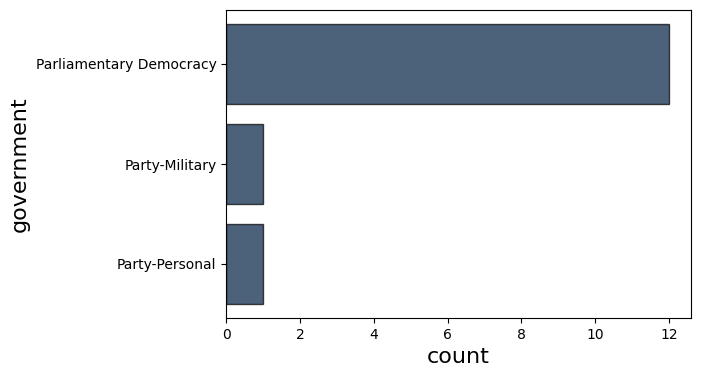

In [ ]:
politics_women_type.barh("government", "count")

In [ ]:
politics_men_type = politics_men.group("government")
politics_men_type

government,count
Dominant Party,15
Foreign/Occupied,2
Military,1
Military-Personal,2
Monarchy,13
Parliamentary Democracy,62
Party-Military,1
Party-Personal,7
Party-Personal-Military Hybrid,1
Personal Dictatorship,18


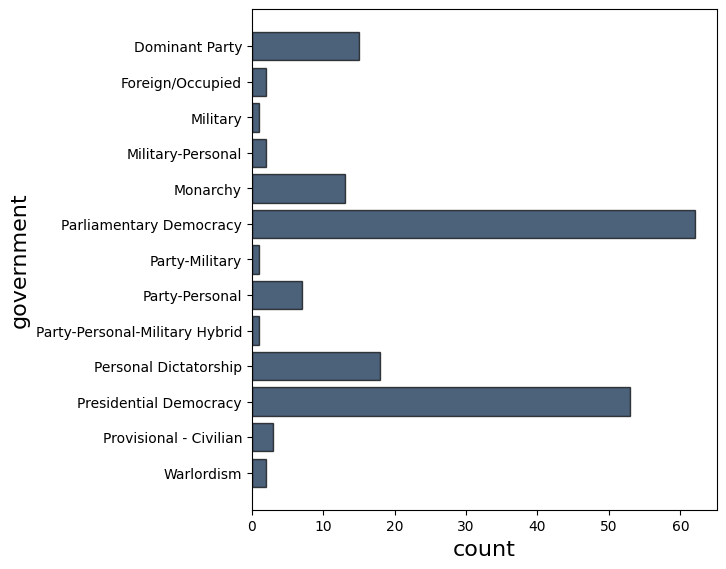

In [ ]:
politics_men_type.barh("government", "count")

In [ ]:
military_politics = politics.where("militarycareer", are.equal_to(1))
military_politics_men = politics.where("male", are.equal_to(1))
military_politics_men_num = military_politics_men.where("militarycareer", are.equal_to(1))
military_politics_women = politics.where("male", are.equal_to(0))
military_politics_women_num = military_politics_women.where("militarycareer", are.equal_to(1))

military_politics_women_num


ccode,country,leader,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,prev_conflict


In [ ]:
military_politics_men_num

ccode,country,leader,elected,age,male,militarycareer,tenure_months,government,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,prev_conflict
40,Cuba,Raul Castro,1,89,1,1,147,Party-Personal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110,Guyana,David Granger,1,75,1,1,60,Parliamentary Democracy,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0
115,Suriname,Bouterse,1,75,1,1,117,Parliamentary Democracy,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
140,Brazil,Bolsonaro,1,65,1,1,16,Presidential Democracy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
150,Paraguay,Benitez,1,49,1,1,21,Presidential Democracy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
370,Belarus,Lukashenko,1,66,1,1,310,Personal Dictatorship,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
404,Guinea Bissau,Embalo,1,48,1,1,3,Presidential Democracy,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0
411,Equatorial Guinea,Nguema Mbasogo,1,78,1,1,489,Personal Dictatorship,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
435,Mauritania,Ould Ghazouani,1,64,1,1,9,Personal Dictatorship,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
451,Sierra Leone,Julius Maada Bio,1,56,1,1,25,Presidential Democracy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
